In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df_completo = pd.read_csv('datos/csv_df_completo.csv', index_col = 0)
df_completo.sample(3)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
12276,589,55-59,Man,Japan,I prefer not to answer,Currently not employed,20+ years,Python,A personal computer / desktop,6-25 times,10-20 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R, SQL, C, C++, Swift, Bash, Other",Vim / Emacs,Other,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,PyTorch ,PyTorch Li...","Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,"General purpose image/video tools (PIL, cv2, s...","Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,"Generative Networks (GAN, VAE, etc)",NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...","Encoder-decorder models (seq2seq, vanilla tran...","Contextualized embeddings (ELMo, CoVe)","Transformer language models (GPT-3, BERT, XLne...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
colum_nuevas = {col :  col.lower().replace(' ', '_') for col in df_completo.columns}
df_completo.rename(columns = colum_nuevas, inplace = True) 

In [4]:
df_completo.sample(3)

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
4748,530,18-21,Man,Bangladesh,I prefer not to answer,Student,1-3 years,R,A personal computer / desktop,2-5 times,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Python, C","Visual Studio ,Visual Studio Code (VSCode) ,Ju...",None,"Matplotlib ,Seaborn","Scikit-learn , TensorFlow ,Keras","Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,"Transformer language models (GPT-3, BERT, XLne...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df_da = df_completo[df_completo["q5"] == "Data Analyst"]
df_da.head()

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,A laptop,Never,1-2 years,Energy/Mining,"1000-9,999 employees",5-9,We are exploring ML methods (and may one day p...,"2,000-2,999",$0 ($USD),NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certi

In [6]:
df_q8 = df_da['q8'].value_counts().reset_index()
df_q8

,index,q8
0,Python,1587
1,SQL,261
2,R,199
3,C++,22
4,Java,18
5,Other,16
6,C,12
7,MATLAB,11
8,None,10
9,Javascript,9


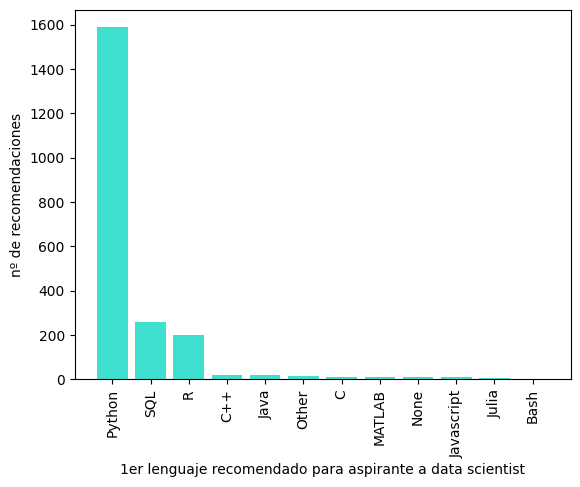

In [7]:
plt.figure()
plt.bar(df_q8['index'], df_q8['q8'], color='turquoise')
plt.xlabel('1er lenguaje recomendado para aspirante a data scientist')
plt.ylabel('nº de recomendaciones') 
plt.xticks(rotation = 'vertical')
plt.show()

In [8]:
# filtramos por país
df_da_esp = df_da[df_da['q3'] == 'Spain']
df_da_esp.sample(1)

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
21212,416,25-29,Man,Spain,Master’s degree,Data Analyst,3-5 years,R,A laptop,Never,< 1 year,Academics/Education,250-999 employees,5-9,I do not know,NaN,NaN,NaN,NaN,NaN,"Python, R","RStudio , Spyder",None,Ggplot / ggplot2,"TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
df_da['q3'].unique()

array(['Belgium', 'United States of America', 'Egypt', 'China',
       'South Africa', 'India', 'Israel', 'Colombia', 'Brazil', 'Ukraine',
       'Pakistan', 'Other', 'Canada', 'Nigeria', 'Tunisia', 'Italy',
       'Spain', 'Indonesia', 'Sri Lanka',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Kenya', 'Iran, Islamic Republic of...', 'South Korea', 'Russia',
       'Peru', 'Germany', 'France', 'Greece', 'Taiwan', 'Portugal',
       'Australia', 'Philippines', 'Singapore', 'Netherlands', 'Japan',
       'Mexico', 'Saudi Arabia', 'Argentina', 'Ghana', 'Morocco',
       'Poland', 'Thailand', 'Switzerland', 'Hong Kong (S.A.R.)',
       'Ecuador', 'Bangladesh', 'Malaysia', 'Romania', 'Viet Nam',
       'United Arab Emirates', 'Ethiopia', 'Czech Republic',
       'I do not wish to disclose my location', 'Sweden', 'Iraq',
       'Ireland', 'Denmark', 'Uganda', 'Belarus', 'Nepal', 'Austria',
       'Chile', 'Kazakhstan', 'Norway'], dtype=object)

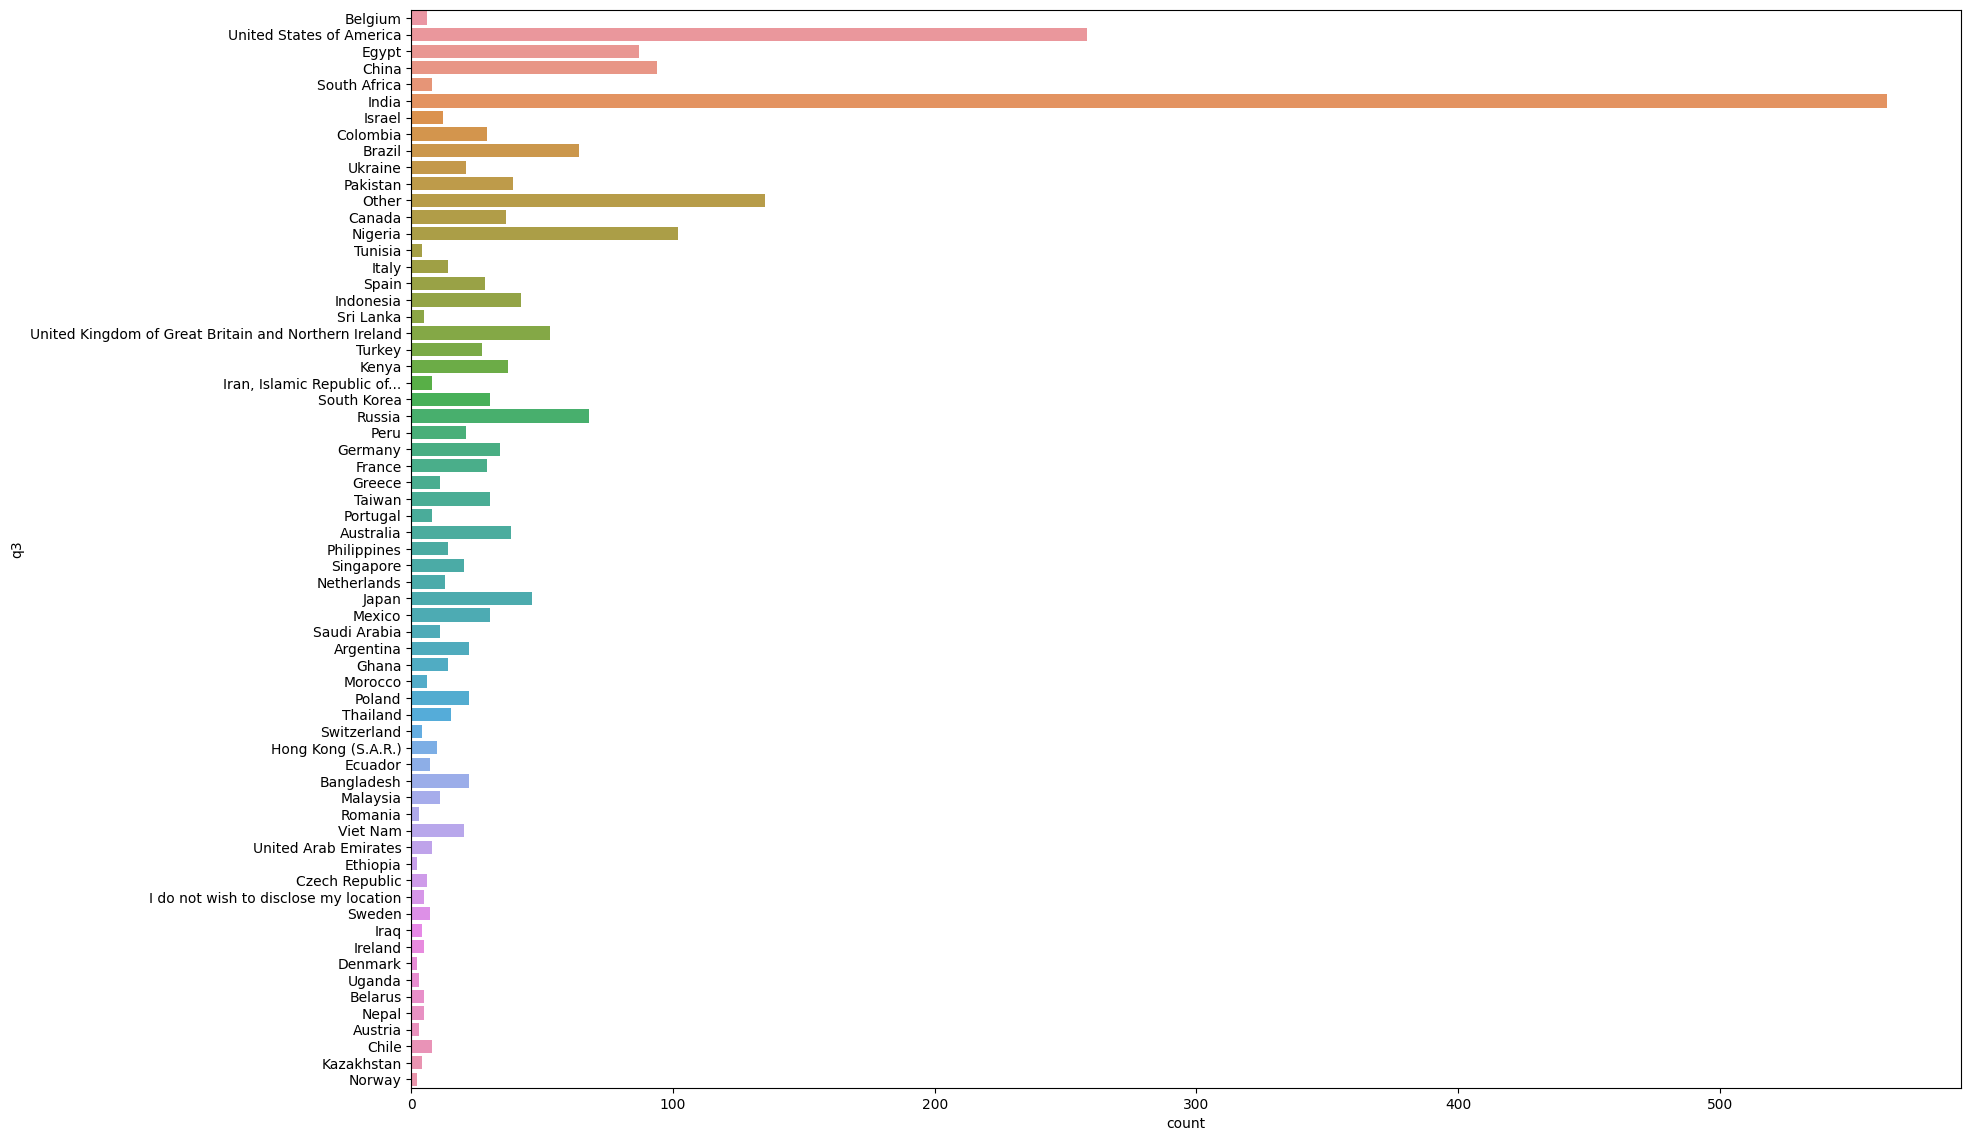

In [10]:
# sacamos la encuesta por países
plt.figure(figsize=(20,14))

fig = sns.countplot(y = 'q3', data = df_da)

plt.show()

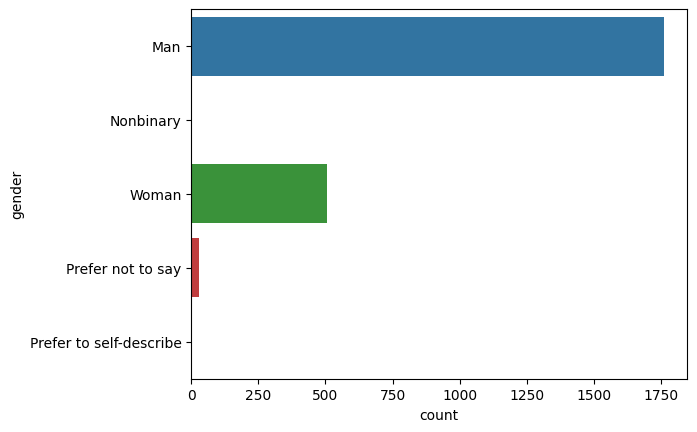

In [11]:
plt.figure()

fig = sns.countplot(y = 'gender', data = df_da)

plt.show()

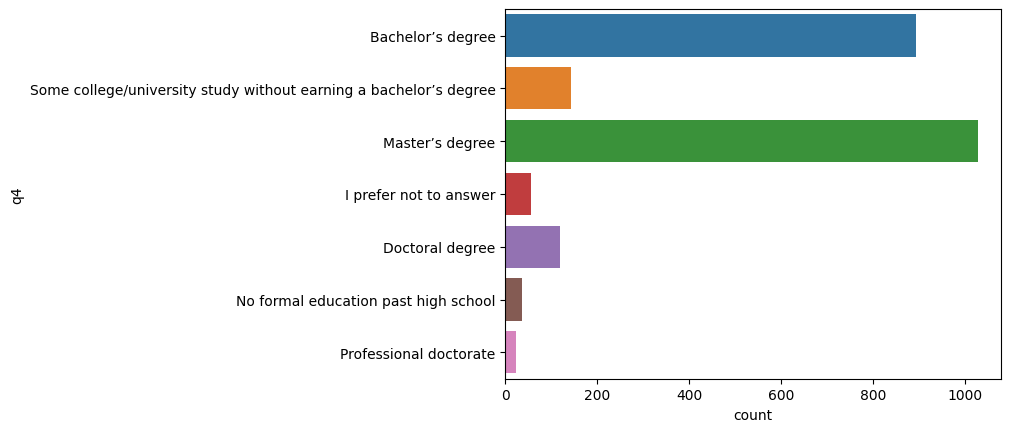

In [12]:
plt.figure()

fig = sns.countplot(y = 'q4', data = df_da)

plt.show()

In [13]:
df_da['q7'].value_counts()

Python, SQL                                466
Python                                     315
Python, R, SQL                             259
Python, R                                   97
 SQL                                        78
                                          ... 
Python, R, Javascript, MATLAB                1
Python, R, SQL, Julia                        1
Python, R, Javascript, Bash                  1
Python, C, C++, Java, Other                  1
Python, R, SQL, Java, Javascript, Other      1
Name: q7, Length: 213, dtype: int64

In [14]:
df_da.sample(3)

,time,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q30_b_part_1,q30_b_part_2,q30_b_part_3,q30_b_part_4,q30_b_part_5,q30_b_part_6,q30_b_part_7,q30_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
14237,170,22-24,Man,China,Master’s degree,Data Analyst,< 1 years,Python,A laptop,Once,4-5 years,Academics/Education,0-49 employees,0,We are exploring ML methods (and may one day p...,$0-999,$0 ($USD),NaN,NaN,NaN,"Python, MATLAB",MATLAB,AWS Inferentia Chips,Other,Keras,Generative Adversarial Networks,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,Azure Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Object detection methods (YOLOv3, RetinaNet, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Axes: xlabel='count', ylabel='q6'>

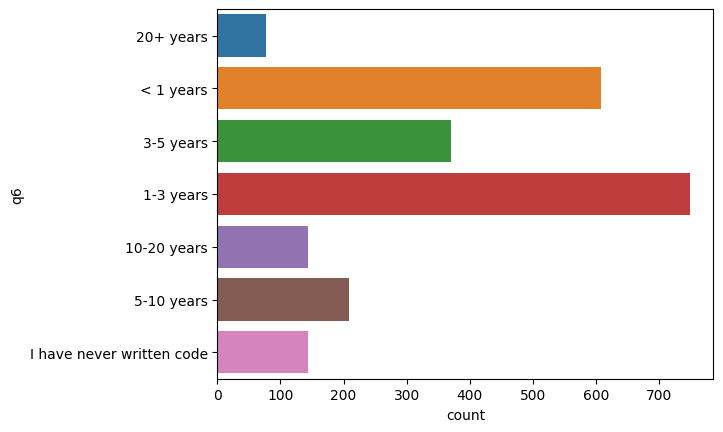

In [15]:
sns.countplot(y ='q6', data = df_da)

In [16]:
df_da['q4'].unique()

array(['Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'Master’s degree', 'I prefer not to answer', 'Doctoral degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

In [17]:
df_da.describe(include = 'object')

,age,gender,q3,q4,q5,q6,q8,q11,q13,q15,q20,q21,q22,q23,q25,q26,q33,q35,q41,q7,q9,q12,q14,q16,q17,q24,q32,q34,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q19_part_1,q19_part_2,q19_part_3,q19_part_4,q19_part_5,q19_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q28,q29_a_part_1,q29_a_part_2,q29_a_part_3,q29_a_part_4,q29_a_other,q30_a_part_1,q30_a_part_2,q30_a_part_3,q30_a_part_4,q30_a_part_5,q30_a_part_6,q30_a_part_7,q30_a_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q38_a_part_1,q38_a_part_2,q38_a_part_3,q38_a_part_4,q38_a_part_5,q38_a_part_6,q38_a_part_7,q38_a_part_8,q38_a_part_9,q38_a_part_10,q38_a_part_11,q38_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q29_b_part_1,q29_b_part_2,q29_b_part_3,q29_b_part_4,q29_b_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_8,q38_b_part_9,q38_b_part_10,q38_b_part_11,q38_b_other
count,2301,2301,2301,2301,2301,2301,2157,2148,2134,2094,2187,2171,2151,2114,2039,2009,607,443,1768,2158,2155,2140,2108,1648,1636,2074,1239,1232,793,662,110,14,177,15,97,51,34,169,187,70,20,21,25,658,95,103,120,99,172,75,111,10,127,102,36,109,92,7,384,295,364,80,72,55,48,60,44,34,406,40,364,192,168,193,290,18,108,101,185,64,220,97,227,14,79,126,87,52,104,33,55,48,835,36,103,78,148,35,58,84,896,32,85,33,36,40,42,53,110,27,23,40,8,14,118,13,15,20,14,85,950,28,35,49,23,562,93,438,197,50,417,48,892,308,818,543,60,269,714,367,149,371,139,226,309,303,271,1049,267,969,180,684,184,191,120,57,465,383,448,136,136,86,44,72,38,30,137,27,337,394,450,81,6,226,378,322,122,176,58,104,85,240,28,430,277,193,173,272,118,87,285,231,124,108,74,80,150,216,245,93,160,90,78,22,468,75,280,63,500,104,161,99,19,23,73,21,108,116,19,101,18,210,219,316,114,182,273,266,26,317,84,130,113,173,238,80,20,80,87,53,39,236,50,66,72,53,186,386,31
unique,11,5,65,7,1,7,12,6,5,9,18,5,7,6,26,6,20,14,6,213,408,20,191,298,221,70,326,133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

In [18]:
df_da['age'].value_counts()

25-29    588
30-34    420
22-24    419
35-39    280
18-21    191
40-44    163
45-49    105
50-54     67
55-59     32
60-69     28
70+        8
Name: age, dtype: int64

In [19]:
import re

In [20]:
col_todas = list(df_completo.columns)
print(col_todas)

['time', 'age', 'gender', 'q3', 'q4', 'q5', 'q6', 'q8', 'q11', 'q13', 'q15', 'q20', 'q21', 'q22', 'q23', 'q25', 'q26', 'q33', 'q35', 'q41', 'q7', 'q9', 'q12', 'q14', 'q16', 'q17', 'q24', 'q32', 'q34', 'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5', 'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10', 'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14', 'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2', 'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other', 'q19_part_1', 'q19_part_2', 'q19_part_3', 'q19_part_4', 'q19_part_5', 'q19_other', 'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4', 'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8', 'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other', 'q28', 'q29_a_part_1', 'q29_a_part_2', 'q29_a_part_3', 'q29_a_part_4', 'q29_a_other', 'q30_a_part_1', 'q30_a_part_2', 'q30_a_part_3', 'q30_a_part_4', 'q30_a_part_5', 'q30_a_part_6', 

In [21]:
# creamos el df con las columnas que queremos usar
df_resumido = df_da[['age','gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9', 'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5', 'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10', 'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14', 'q10_part_15', 'q10_part_16', 'q10_other', 'q14', 'q34', 'q35', 'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5', 'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other', 'q41']]
df_resumido.sample(5)

,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
10389,25-29,Man,Ukraine,I prefer not to answer,< 1 years,Python,Python,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2214,22-24,Man,India,Bachelor’s degree,1-3 years,"Python, SQL",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Observable Notebooks,NaN,NaN,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
11260,25-29,Woman,India,Bachelor’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
14925,35-39,Man,India,Master’s degree,3-5 years,"Python, SQL, C, C++",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Ggplot / ggplot2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)"
18906,45-49,Man,Other,Doctoral degree,5-10 years,Python,Python,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,"Matplotlib ,Seaborn",None,NaN,NaN,NaN,NaN,GitHub,Personal blog,Kaggle,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."


In [22]:
# creamos un df con la pregunta q10
df_q10 = df_resumido[['q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5', 'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10', 'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14', 'q10_part_15', 'q10_part_16', 'q10_other']]
df_q10.sample()

,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other
5914,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# intentamos poner en el nombre de las columnas el valor de la respuesta =! de 'Nan'
df_q10['q10_part_1'].value_counts()

 Kaggle Notebooks    793
Name: q10_part_1, dtype: int64

In [24]:
df_q10['q10_part_1'].unique()

array([' Kaggle Notebooks', nan], dtype=object)

In [25]:
df_q10['q10_part_2'].unique()

array(['Colab Notebooks', nan], dtype=object)

In [26]:
df_q10.describe(include='object')

,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other
count,793,662,110,14,177,15,97,51,34,169,187,70,20,21,25,658,95
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,Databricks Collaborative Notebooks,Zeppelin / Zepl Notebooks,Deepnote Notebooks,Observable Notebooks,None,Other
freq,793,662,110,14,177,15,97,51,34,169,187,70,20,21,25,658,95


In [27]:
df_q10.columns

Index(['q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other'],
      dtype='object')

In [28]:
df_q10['q10_part_1'].unique()

array([' Kaggle Notebooks', nan], dtype=object)

In [29]:
# CREAMOS UN DICCIONARIO CON LOS NOMBRES ANTIGUOS Y NUEVOS QUE QUEREMOS EN LAS COLUMNAS DE df_q10
nomb_col_q10 = {}
for col in df_q10.columns:
    try: 
        for i in df_q10[col].unique():
            i = str(i)
            if i != 'nan':
                i = i.strip().replace(' ', '_')
                nomb_col_q10[col] = i
            else:
                pass
    except:
        print('estoy en el except con la columna {col} , elemento {i}')
print(f'DICCIONARIO NOMBRES COLUMNAS: {nomb_col_q10}')

DICCIONARIO NOMBRES COLUMNAS: {'q10_part_1': 'Kaggle_Notebooks', 'q10_part_2': 'Colab_Notebooks', 'q10_part_3': 'Azure_Notebooks', 'q10_part_4': 'Paperspace_/_Gradient', 'q10_part_5': 'Binder_/_JupyterHub', 'q10_part_6': 'Code_Ocean', 'q10_part_7': 'IBM_Watson_Studio', 'q10_part_8': 'Amazon_Sagemaker_Studio_Notebooks', 'q10_part_9': 'Amazon_EMR_Notebooks', 'q10_part_10': 'Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI)', 'q10_part_11': 'Google_Cloud_Datalab', 'q10_part_12': 'Databricks_Collaborative_Notebooks', 'q10_part_13': 'Zeppelin_/_Zepl_Notebooks', 'q10_part_14': 'Deepnote_Notebooks', 'q10_part_15': 'Observable_Notebooks', 'q10_part_16': 'None', 'q10_other': 'Other'}


In [30]:
# RENOMBRAMOS LAS COLUMNAS DE df_q10
df_q10.rename(columns = nomb_col_q10, inplace = True)
df_q10.sample()


/tmp/ipykernel_7497/1263190726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q10.rename(columns = nomb_col_q10, inplace = True)


,Kaggle_Notebooks,Colab_Notebooks,Azure_Notebooks,Paperspace_/_Gradient,Binder_/_JupyterHub,Code_Ocean,IBM_Watson_Studio,Amazon_Sagemaker_Studio_Notebooks,Amazon_EMR_Notebooks,Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),Google_Cloud_Datalab,Databricks_Collaborative_Notebooks,Zeppelin_/_Zepl_Notebooks,Deepnote_Notebooks,Observable_Notebooks,None,Other
1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [31]:
df_q10.head(2)

,Kaggle_Notebooks,Colab_Notebooks,Azure_Notebooks,Paperspace_/_Gradient,Binder_/_JupyterHub,Code_Ocean,IBM_Watson_Studio,Amazon_Sagemaker_Studio_Notebooks,Amazon_EMR_Notebooks,Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),Google_Cloud_Datalab,Databricks_Collaborative_Notebooks,Zeppelin_/_Zepl_Notebooks,Deepnote_Notebooks,Observable_Notebooks,None,Other
16,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Databricks Collaborative Notebooks,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# antes de realizar el cambio realizamos una cuenta para confirmar que se hace bien el cambio
df_q10['Kaggle_Notebooks'].value_counts()

 Kaggle Notebooks    793
Name: Kaggle_Notebooks, dtype: int64

In [37]:
# cambiamos los NaN por 0 y el resto por 1
for col in df_q10.columns:
    df_q10[col] = df_q10[col].apply(lambda dataframe: np.where(type(dataframe) != float, 1, 0))

/tmp/ipykernel_7497/3027637057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q10[col] = df_q10[col].apply(lambda dataframe: np.where(type(dataframe) != float, 1, 0))


In [38]:

#df_q10['Kaggle_Notebooks_borrar'] = df_q10['Kaggle_Notebooks'].apply(lambda dataframe: np.where(type(dataframe) != float, 1, 0))

In [39]:
df_q10.head(2)

,Kaggle_Notebooks,Colab_Notebooks,Azure_Notebooks,Paperspace_/_Gradient,Binder_/_JupyterHub,Code_Ocean,IBM_Watson_Studio,Amazon_Sagemaker_Studio_Notebooks,Amazon_EMR_Notebooks,Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),Google_Cloud_Datalab,Databricks_Collaborative_Notebooks,Zeppelin_/_Zepl_Notebooks,Deepnote_Notebooks,Observable_Notebooks,None,Other
16,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
df_q10.sum().reset_index()

,index,0
0,Kaggle_Notebooks,793
1,Colab_Notebooks,662
2,Azure_Notebooks,110
3,Paperspace_/_Gradient,14
4,Binder_/_JupyterHub,177
5,Code_Ocean,15
6,IBM_Watson_Studio,97
7,Amazon_Sagemaker_Studio_Notebooks,51
8,Amazon_EMR_Notebooks,34
9,Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),169


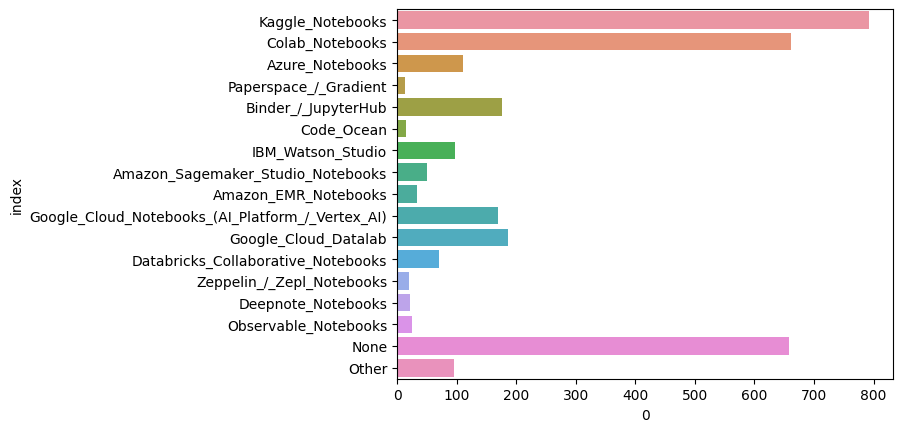

In [41]:
plt.figure()
fig = sns.barplot(x = df_q10.sum().reset_index()[0], y = df_q10.sum().reset_index()['index'])
plt.show()

In [42]:
# creamos un df con la pregunta q39
df_q39 = df_resumido[['q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5', 'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other']]
df_q39.sample()

,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other
17439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# CREAMOS UN DICCIONARIO CON LOS NOMBRES ANTIGUOS Y NUEVOS QUE QUEREMOS EN LAS COLUMNAS DE df_q39
nomb_col_q39 = {}
for col in df_q39.columns:
    try: 
        for i in df_q39[col].unique():
            i = str(i)
            if i != 'nan':
                i = i.strip().replace(' ', '_')
                nomb_col_q39[col] = i
            else:
                pass
    except:
        print('estoy en el except con la columna {col} , elemento {i}')
print(f'DICCIONARIO NOMBRES COLUMNAS: {nomb_col_q39}')

DICCIONARIO NOMBRES COLUMNAS: {'q39_part_1': 'Plotly_Dash', 'q39_part_2': 'Streamlit', 'q39_part_3': 'NBViewer', 'q39_part_4': 'GitHub', 'q39_part_5': 'Personal_blog', 'q39_part_6': 'Kaggle', 'q39_part_7': 'Colab', 'q39_part_8': 'Shiny', 'q39_part_9': 'I_do_not_share_my_work_publicly', 'q39_other': 'Other'}


In [44]:
# RENOMBRAMOS LAS COLUMNAS DE df_q39
df_q39.rename(columns = nomb_col_q39, inplace = True)
df_q39.sample()

/tmp/ipykernel_7497/745780804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q39.rename(columns = nomb_col_q39, inplace = True)


,Plotly_Dash,Streamlit,NBViewer,GitHub,Personal_blog,Kaggle,Colab,Shiny,I_do_not_share_my_work_publicly,Other
25303,NaN,NaN,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN


In [45]:
df_q39.head(2)

,Plotly_Dash,Streamlit,NBViewer,GitHub,Personal_blog,Kaggle,Colab,Shiny,I_do_not_share_my_work_publicly,Other
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# cambiamos los NaN por 0 y el resto por 1
for col in df_q39.columns:
    df_q39[col] = df_q39[col].apply(lambda dataframe: np.where(type(dataframe) != float, 1, 0))

/tmp/ipykernel_7497/680667916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q39[col] = df_q39[col].apply(lambda dataframe: np.where(type(dataframe) != float, 1, 0))


In [47]:
df_q39.head(2)

,Plotly_Dash,Streamlit,NBViewer,GitHub,Personal_blog,Kaggle,Colab,Shiny,I_do_not_share_my_work_publicly,Other
16,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0


In [48]:
df_q39.sum().reset_index()

,index,0
0,Plotly_Dash,35
1,Streamlit,49
2,NBViewer,23
3,GitHub,562
4,Personal_blog,93
5,Kaggle,438
6,Colab,197
7,Shiny,50
8,I_do_not_share_my_work_publicly,417
9,Other,48


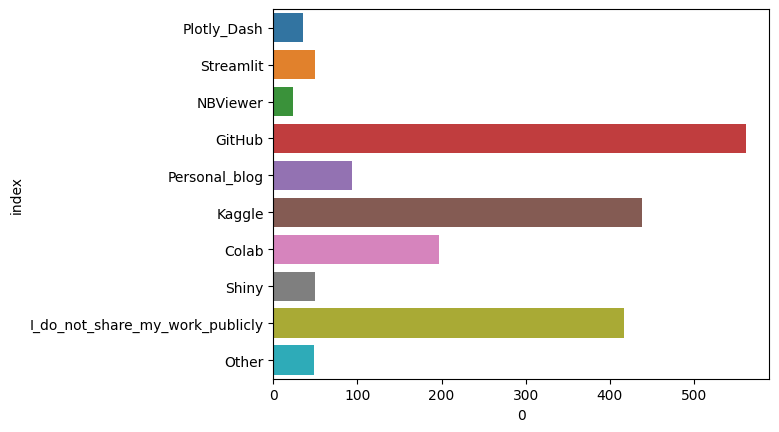

In [49]:
plt.figure()
fig = sns.barplot(x = df_q39.sum().reset_index()[0], y = df_q39.sum().reset_index()['index'])
plt.show()